In [1]:
%load_ext autoreload
%autoreload 2
import viewscad

r = viewscad.Renderer()

In [9]:
from solid.objects import cube, cylinder, translate, linear_extrude, mirror, Vec3, rotate
from solid.utils import arc

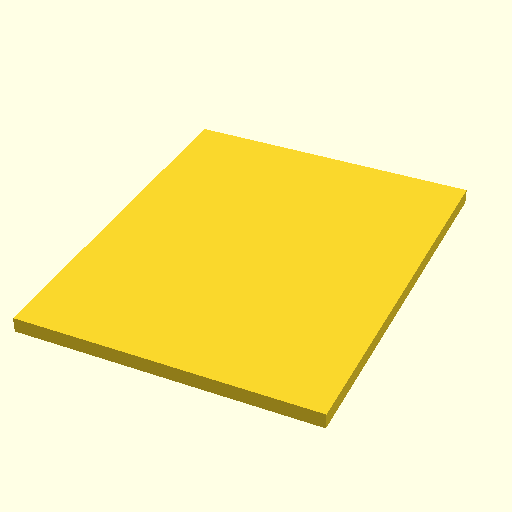

In [56]:
base_thickness = 4
base_width = 80
base_length = 100

base = cube(
    size=(base_width, base_length, base_thickness)
)
base

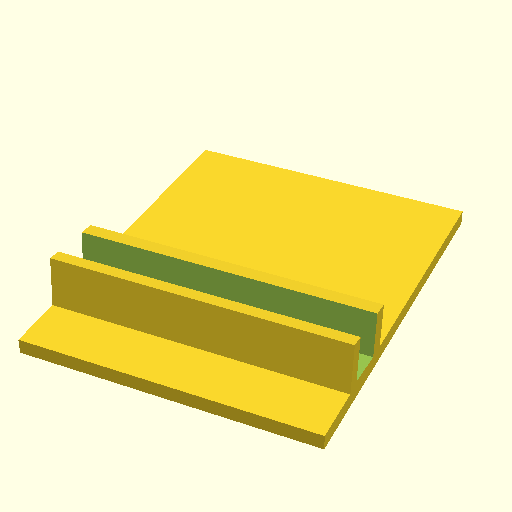

In [73]:
cutout_thickness = 11

cutout = cube(
    size=(base_width * 2, base_length * 2, cutout_thickness)
)

cutout_rotation = 85
cutout_height = 4
cutout_lead_space = 30
cutout = rotate(
    a=cutout_rotation, v=(1, 0, 0)
)(cutout)
cutout = translate((-base_width / 2, cutout_lead_space, cutout_height))(cutout)

outside = cube(
    size=(base_width, base_thickness * 4, cutout_thickness + 2 * base_thickness)
)
outside = rotate(
    a=cutout_rotation, v=(1, 0, 0)
)(outside)
outside = translate((0, cutout_lead_space + base_thickness, 0))(outside)

holder = base + outside - cutout
holder

In [74]:
# generate valid openscad code and store it in file
from solid import scad_render_to_file
scad_render_to_file(holder, 'holder.scad')

# run openscad and export to stl
from subprocess import run
run(["openscad", "-o",  "holder.stl", "holder.scad"])

CompletedProcess(args=['openscad', '-o', 'holder.stl', 'holder.scad'], returncode=0)